In [1]:
import torch
import torch.nn as nn
from src.utils import analyze_predictions, plot_losses_accs
from src.preprocess import preprocess
from src.train import trainNN
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/xyz_dataset.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
df_valid, df_test = train_test_split(df_test, test_size=0.5, random_state=42, stratify=df_test['label'])
df_train["label"].value_counts(normalize=True), df_test["label"].value_counts(
    normalize=True
), df_valid["label"].value_counts(normalize=True)

(label
 1.0    0.597455
 2.0    0.334319
 0.0    0.068226
 Name: proportion, dtype: float64,
 label
 1.0    0.597360
 2.0    0.334433
 0.0    0.068207
 Name: proportion, dtype: float64,
 label
 1.0    0.597688
 2.0    0.334067
 0.0    0.068244
 Name: proportion, dtype: float64)

In [3]:
train_loader = preprocess(df_train, batch_size=256)
valid_loader = preprocess(df_valid, batch_size=256)
test_loader = preprocess(df_test, batch_size=256)

model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(32, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(32 * 5 * 5, 128),
    nn.ReLU(),
    nn.Linear(128, 3),
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
model, train_loss, test_loss, train_acc, test_acc = trainNN(
    model, train_loader, valid_loader, criterion, optimizer, num_epochs, device, log_train=True, log_test=True
)

Epoch [1/10], Loss: 0.0355, Accuracy: 98.81%
Test Loss: 0.0405, Test Accuracy: 98.90%
Epoch [2/10], Loss: 0.0129, Accuracy: 99.61%
Test Loss: 0.0195, Test Accuracy: 99.45%
Epoch [3/10], Loss: 0.0072, Accuracy: 99.78%
Test Loss: 0.0151, Test Accuracy: 99.50%
Epoch [4/10], Loss: 0.0032, Accuracy: 99.92%
Test Loss: 0.0155, Test Accuracy: 99.67%
Epoch [5/10], Loss: 0.0021, Accuracy: 99.95%
Test Loss: 0.0145, Test Accuracy: 99.67%
Epoch [6/10], Loss: 0.0015, Accuracy: 99.98%
Test Loss: 0.0129, Test Accuracy: 99.72%
Epoch [7/10], Loss: 0.0010, Accuracy: 99.99%
Test Loss: 0.0154, Test Accuracy: 99.72%
Epoch [8/10], Loss: 0.0007, Accuracy: 99.99%
Test Loss: 0.0091, Test Accuracy: 99.78%
Epoch [9/10], Loss: 0.0007, Accuracy: 99.99%
Test Loss: 0.0170, Test Accuracy: 99.72%
Epoch [10/10], Loss: 0.0002, Accuracy: 100.00%
Test Loss: 0.0131, Test Accuracy: 99.72%


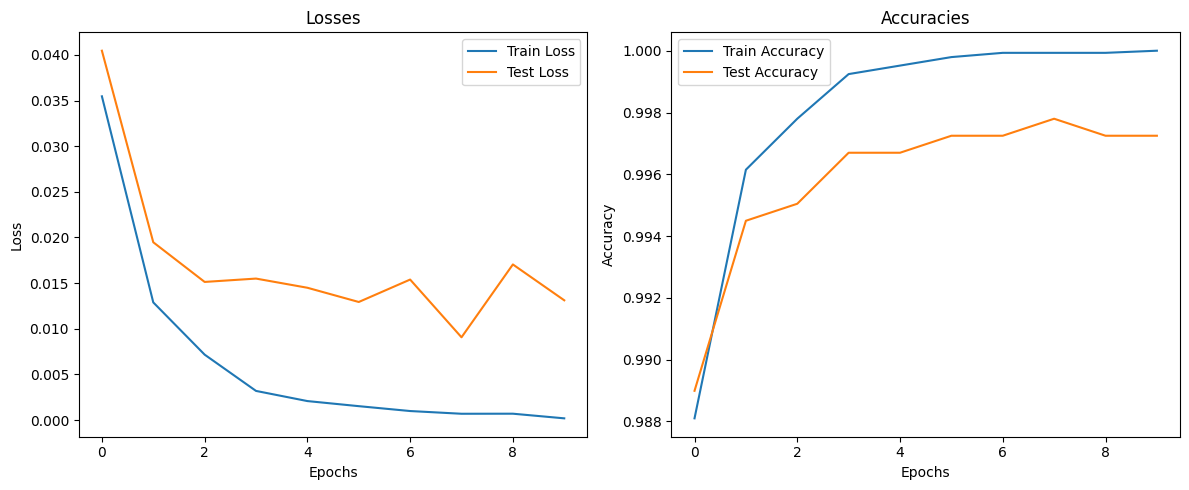

In [5]:
plot_losses_accs(train_loss, test_loss, train_acc, test_acc)

              precision    recall  f1-score   support

           X      0.968     1.000     0.984       120
           Y      1.000     0.998     0.999      1088
           Z      1.000     0.997     0.998       610

    accuracy                          0.998      1818
   macro avg      0.989     0.998     0.994      1818
weighted avg      0.998     0.998     0.998      1818



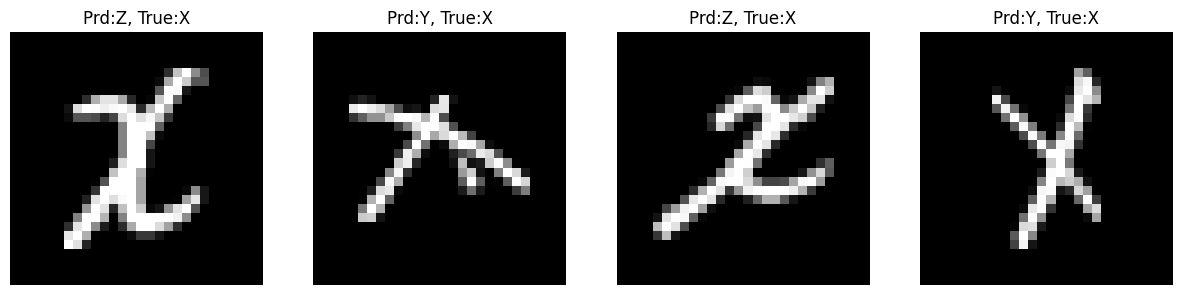

In [6]:
analyze_predictions(model, test_loader, device)

In [7]:
# Save the model
torch.save(model, "models/model.pth")

CNN model achieved almost 99% precision, recall and F1 score on the test set. Furthermore at least one of the wrongly misclassified images is wrongly labeled due to human error. The model performs worst on class 'X' which is expected as it has the least number of samples, however it is still good performance with 98% f1 score. There is no point tuning parameters, however I could reduce number of epochs or try to minimize the number of layers.

In [10]:
model_mini = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(32 * 13 * 13, 3),
)

model_mini.to(device)
num_epochs = 10
optimizer = torch.optim.Adam(model_mini.parameters(), lr=0.001)
model_mini, train_loss, test_loss, train_acc, test_acc = trainNN(
    model_mini, train_loader, valid_loader, criterion, optimizer, num_epochs, device, log_train=True, log_test=True
)

Epoch [1/10], Loss: 0.3330, Accuracy: 98.62%
Test Loss: 0.4287, Test Accuracy: 98.18%
Epoch [2/10], Loss: 0.0733, Accuracy: 99.22%
Test Loss: 0.1203, Test Accuracy: 98.73%
Epoch [3/10], Loss: 0.1286, Accuracy: 98.50%
Test Loss: 0.1647, Test Accuracy: 98.29%
Epoch [4/10], Loss: 0.0171, Accuracy: 99.77%
Test Loss: 0.1051, Test Accuracy: 99.12%
Epoch [5/10], Loss: 0.0246, Accuracy: 99.64%
Test Loss: 0.0593, Test Accuracy: 99.45%
Epoch [6/10], Loss: 0.0105, Accuracy: 99.77%
Test Loss: 0.0498, Test Accuracy: 99.50%
Epoch [7/10], Loss: 0.0183, Accuracy: 99.76%
Test Loss: 0.1825, Test Accuracy: 98.90%
Epoch [8/10], Loss: 0.0160, Accuracy: 99.83%
Test Loss: 0.3440, Test Accuracy: 99.06%
Epoch [9/10], Loss: 0.0057, Accuracy: 99.93%
Test Loss: 0.0905, Test Accuracy: 99.56%
Epoch [10/10], Loss: 0.0115, Accuracy: 99.90%
Test Loss: 0.3163, Test Accuracy: 99.39%


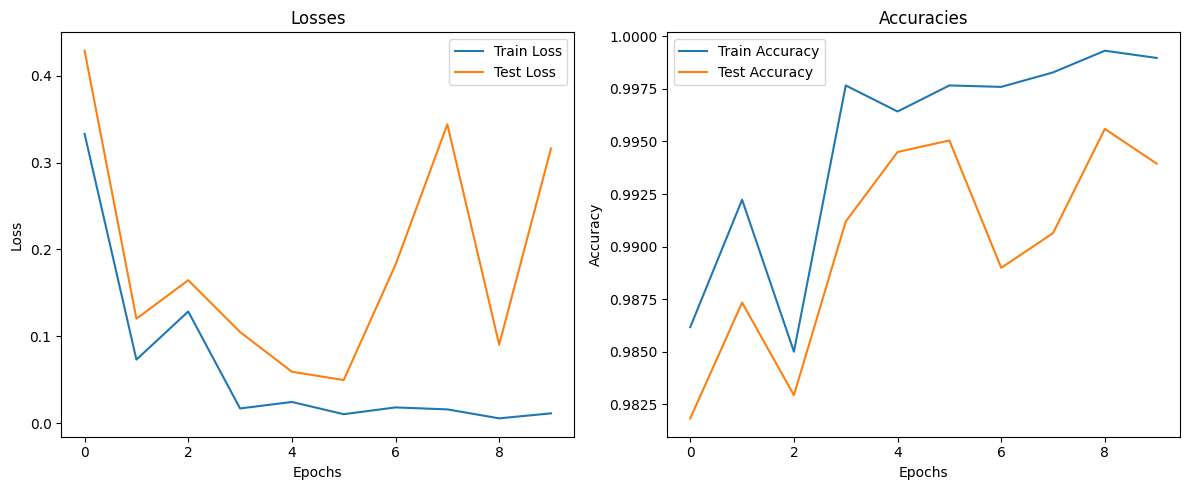

In [11]:
plot_losses_accs(train_loss, test_loss, train_acc, test_acc)

              precision    recall  f1-score   support

           X      0.960     0.992     0.975       120
           Y      0.998     0.994     0.996      1090
           Z      0.995     0.995     0.995       608

    accuracy                          0.994      1818
   macro avg      0.984     0.994     0.989      1818
weighted avg      0.995     0.994     0.995      1818



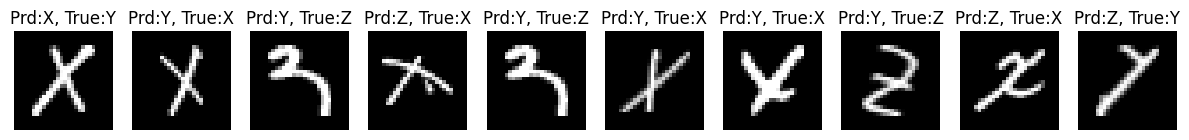

In [12]:
analyze_predictions(model_mini, test_loader, device)

In [13]:
torch.save(model_mini, 'models/model_mini.pth')

In [14]:
# save train, valid, test data for reproduction
df_train.to_csv('data/train.csv', index=False)
df_valid.to_csv('data/valid.csv', index=False)
df_test.to_csv('data/test.csv', index=False)

After reducing network to one linear layer and 1 convolutional layer, the model predicted one more sample wrong. Some of the wrongly missclassified samples repeat